## Observations and Insights 

In [2]:
#Three observations from the data: 

#1. There are more male mice than female mice in the dataset. 

#2. Capomuline and Ramicane regimens had the lowest final tumor volume compared to Infubinol and Ceftamin. 

#3. For mice treated with Capomulin, the heavier the mice, the bigger the average tumor size with a high correlation (0.84). 

In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem, linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# mouse_metadata has 249 rows/unique mice
# study_results has 1893 rows (there are duplicates)
# use outer join to grab all the data and then drop duplicate timepoints, use indicator column to identify any discrepant merges
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer', indicator=True)

# Display the data table for preview
#print(combined_study_data.columns)
#print(combined_study_data.info())
combined_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,k403,Ramicane,Male,21,16,0,45.000000,0,both
1,k403,Ramicane,Male,21,16,5,38.825898,0,both
2,k403,Ramicane,Male,21,16,10,35.014271,1,both
3,k403,Ramicane,Male,21,16,15,34.223992,1,both
4,k403,Ramicane,Male,21,16,20,32.997729,1,both
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,both
1889,z969,Naftisol,Male,9,30,30,65.841013,3,both
1890,z969,Naftisol,Male,9,30,35,69.176246,4,both
1891,z969,Naftisol,Male,9,30,40,70.314904,4,both


In [4]:
# Checking the number of mice.print(combined_study_data["Mouse ID"].value_counts())
print(combined_study_data["Mouse ID"].value_counts())
print("-----------------------------")
print(combined_study_data["Mouse ID"].count())

g989    13
c139    10
y793    10
s337    10
g497    10
        ..
x336     1
u153     1
d133     1
b447     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64
-----------------------------
1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_data[combined_study_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice

#Check for the duplicate mice
#mouse_g989 = combined_study_data.loc[combined_study_data["Mouse ID"] == "g989"]
#mouse_g989
#mouse_q597 = combined_study_data.loc[combined_study_data["Mouse ID"] == "q597"]
#mouse_q597
#mouse_j989 = combined_study_data.loc[combined_study_data["Mouse ID"] == "j989"]
#mouse_j989
#mouse_l661 = combined_study_data.loc[combined_study_data["Mouse ID"] == "l661"]
#mouse_l661

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
909,g989,Propriva,Female,21,26,0,45.000000,0,both
911,g989,Propriva,Female,21,26,5,47.570392,0,both
913,g989,Propriva,Female,21,26,10,49.880528,0,both
915,g989,Propriva,Female,21,26,15,53.442020,0,both
917,g989,Propriva,Female,21,26,20,54.657650,1,both


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_g989 = combined_study_data.loc[combined_study_data["Mouse ID"] == "g989"]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
908,g989,Propriva,Female,21,26,0,45.000000,0,both
909,g989,Propriva,Female,21,26,0,45.000000,0,both
910,g989,Propriva,Female,21,26,5,48.786801,0,both
911,g989,Propriva,Female,21,26,5,47.570392,0,both
912,g989,Propriva,Female,21,26,10,51.745156,0,both
913,g989,Propriva,Female,21,26,10,49.880528,0,both
914,g989,Propriva,Female,21,26,15,51.325852,1,both
915,g989,Propriva,Female,21,26,15,53.442020,0,both
916,g989,Propriva,Female,21,26,20,55.326122,1,both
917,g989,Propriva,Female,21,26,20,54.657650,1,both


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_study_data.loc[combined_study_data["Mouse ID"] != "g989",:]

In [8]:
# Checking the number of mice in the clean DataFrame.
#Check to see that the duplicate ID was dropped and we only have 248 unique mouse ID
print(clean_mouse_df["Mouse ID"].value_counts())
print("-----------------------------")
print(clean_mouse_df["Mouse ID"].count())

c139    10
z578    10
o562    10
c302    10
q633    10
        ..
f932     1
b447     1
x336     1
x226     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64
-----------------------------
1880


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_df = clean_mouse_df.groupby("Drug Regimen")
#drug_regimen_df.head()

#Mean tumor volume
mean_tumor_vol = round(drug_regimen_df["Tumor Volume (mm3)"].mean(),2)
#print(mean_tumor_vol)

#Median tumor volume
median_tumor_vol = round(drug_regimen_df["Tumor Volume (mm3)"].median(),2)
#print(median_tumor_vol)

#Variance of tumor volume
var_tumor_vol = round(drug_regimen_df["Tumor Volume (mm3)"].var(),2)
#print(var_tumor_vol)

#Standard devation of tumor volume
sd_tumor_vol = round(drug_regimen_df["Tumor Volume (mm3)"].std(),2)
#print(sd_tumor_vol)

#SEM of tumor volume
sem_tumor_vol = round(drug_regimen_df["Tumor Volume (mm3)"].sem(),2)
#print(sem_tumor_vol)

#Summary table 
drug_summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,  
    "Median Tumor Volume": median_tumor_vol,
    "Variance of Tumor Volume": var_tumor_vol,
    "SD of Tumor Volume": sd_tumor_vol,
    "SEM of Tumor Volume": sem_tumor_vol
})

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,SD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_grouped_df = clean_mouse_df.groupby("Drug Regimen")

#This aggregate function will calculate mean, median, variance, standard deviation, and sem for ALL columns
#drug_summary_table = drug_regimen_grouped_df.agg(['mean', 'median', 'var', 'std', 'sem'])

#This aggregate function will calculate mean, median, variance, standard deviation, and sem for a SPECIFIC column - always use brackes to call a list/column
drug_summary_table = round(drug_regimen_grouped_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"],2).rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Variance of Tumor Volume", "std": "SD of Tumor Volume", "sem": "SEM of Tumor Volume"})
drug_summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,SD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

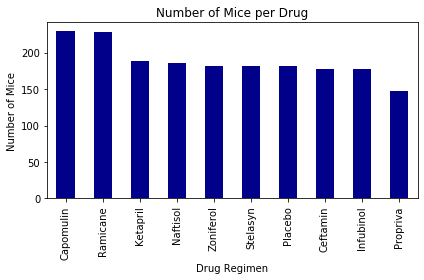

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

clean_mouse_df["Drug Regimen"].value_counts().plot(kind="bar",facecolor="darkblue")

plt.title("Number of Mice per Drug")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

plt.tight_layout()


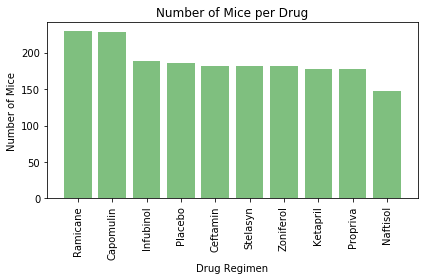

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#grab the name for the x-axis
drug_names = clean_mouse_df["Drug Regimen"].unique()

mice_count_y_axis = clean_mouse_df["Drug Regimen"].value_counts()

plt.bar(drug_names, mice_count_y_axis, color='g', alpha=0.5, align="center")
plt.xticks(drug_names, rotation='vertical')

plt.title("Number of Mice per Drug")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

plt.tight_layout()

Male      958
Female    922
Name: Sex, dtype: int64


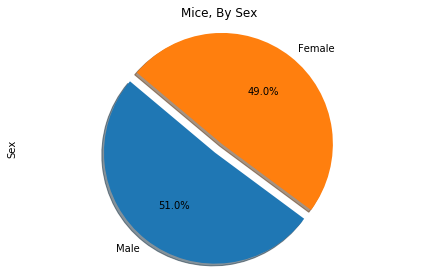

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
print(clean_mouse_df["Sex"].value_counts())

clean_mouse_df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", 
    explode= [0.1,0], shadow=True, startangle=140, title=("Mice, By Sex"))

plt.axis("equal")
plt.tight_layout()

Male      958
Female    922
Name: Sex, dtype: int64


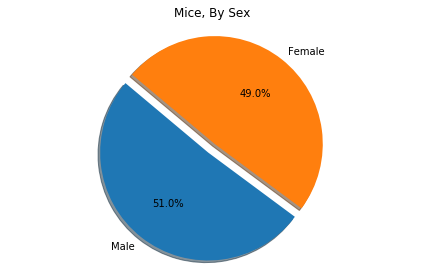

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create labels
labels = ["Male", "Female"]

#Create the size of the slices
sizes = clean_mouse_df["Sex"].value_counts()
print(sizes)

#Make the parts explode
explode = (0.1, 0)

#plot the pie 
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

#tell matplotlib to make a pie chart with equal axes
plt.axis("equal")

plt.title("Mice, By Sex")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#long way of extracting the four drug regimens
#four_drug_regimen = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin") |
#    (clean_mouse_df["Drug Regimen"] == "Ramicane") |
#    (clean_mouse_df["Drug Regimen"] == "Infubinol") |                                     
#    (clean_mouse_df["Drug Regimen"] == "Ceftamin"), :]

#Using a shorter method by using a function isin
four_drug_regimen = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
last_timepoint = four_drug_regimen.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df = pd.merge(last_timepoint, clean_mouse_df, how="left", on="Mouse ID").rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "Last Timepoint"})
combined_df

four_drugs_last_vol = combined_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
print(four_drugs_last_vol)

reset_index_four_drugs = four_drugs_last_vol.reset_index()
print(reset_index_four_drugs)

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64
   Drug Regimen Mouse ID  Tumor Volume (mm3)
0     Capomulin     b128           38.982878
1     Capomulin     b742           38.939633
2     Capomulin     f966           30.485985
3     Capomulin     g288           37.074024
4     Capomulin     g316           40.159220
..          ...      ...                 ...
95     Ramicane     s508           30.276232
96     Ramicane     u196           40.667713
97     Ramicane     w678           43.166373
98     Ramicane     y449           44.183451
99     Ramicane     z578        

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

for treatment in treatments:
    final_tumor_vol.append(reset_index_four_drugs[reset_index_four_drugs['Drug Regimen'] == treatment]
        ['Tumor Volume (mm3)'])
    
#final_tumor_vol

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes

combined_four_regimen = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
    
# Capomulin treatment
capomulin = combined_four_regimen[combined_four_regimen['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']

quartiles = capomulin.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("----------------------------------------------")

# Ramicane treatment
ramicane = combined_four_regimen[combined_four_regimen['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']

quartiles = ramicane.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("----------------------------------------------")

# Infubinol treatment
infubinol = combined_four_regimen[combined_four_regimen['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']

quartiles = infubinol.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("----------------------------------------------")

# Ceftamin treatment
ceftamin = combined_four_regimen[combined_four_regimen['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {round(quartiles[0.5],2)} ")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 37.69
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.31
The the median of Capomulin is: 41.56 
Values below 26.72 could be outliers.
Values above 55.96 could be outliers.
----------------------------------------------
The lower quartile of Ramicane is: 36.67
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.33
The the median of Ramicane is: 40.67 
Values below 24.18 could be outliers.
Values above 57.5 could be outliers.
----------------------------------------------
The lower quartile of Infubinol is: 47.31
The upper quartile of Infubinol is: 57.31
The interquartile range of Infubinol is: 10.0
The the median of Infubinol is: 51.82 
Values below 32.31 could be outliers.
Values above 72.31 could be outliers.
----------------------------------------------
The lower quartile of Ceftamin is: 47.21
The upper quartile of Ceftamin is: 56.8
The interquartile range of Ceftamin is: 9.59
The t

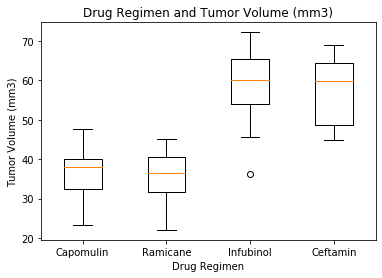

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title('Drug Regimen and Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(final_tumor_vol, labels=treatments)
plt.show()


## Line and Scatter Plots

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', '_merge'],
      dtype='object')


Text(0, 0.5, 'Tumor Volume (mm3)')

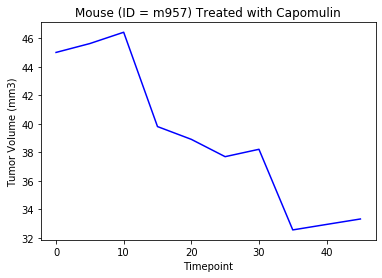

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
print(clean_mouse_df.columns)

y_axis = clean_mouse_df[clean_mouse_df["Mouse ID"]=='m957']['Tumor Volume (mm3)']
x_axis = clean_mouse_df[clean_mouse_df["Mouse ID"]=='m957']['Timepoint']

mouse_plot, = plt.plot(x_axis, y_axis, color="blue")

plt.title("Mouse (ID = m957) Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

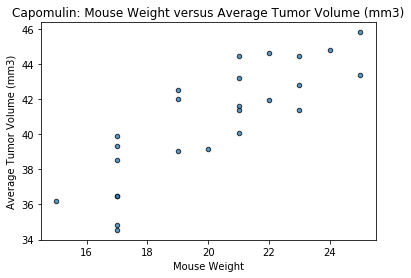

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug_wt_tumor_vol = clean_mouse_df[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Drop all drugs not capomulin
keep_capomulin_only = drug_wt_tumor_vol.loc[(drug_wt_tumor_vol["Drug Regimen"] == "Capomulin")]

# Find the average tumor volume
capomulin = pd.DataFrame(keep_capomulin_only.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
#print(capomulin.head())

# Create scatter plot
capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("Capomulin: Mouse Weight versus Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin["Weight (g)"]
tumor_volume = capomulin["Tumor Volume (mm3)"]

correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


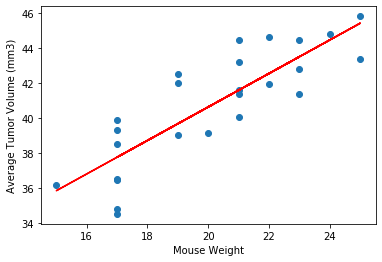

In [22]:
# Compare the calculated Pearson's r to the plots
x_values = weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
